In [1]:
from qiskit.ignis.verification import state_tomography_circuits, StateTomographyFitter
from qiskit.tools import job_monitor

from MPS_decomposition.hdf5_reader import Hdf5Reader
from MPS_decomposition.basic_decomposer import BasicDecomposer
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')
from qiskit.circuit.random import random_circuit
import qiskit.quantum_info as qi


In [6]:
cir1 = random_circuit(2,3)
cir2 = random_circuit(2,3)
cir3 = random_circuit(2,3)
cir = cir1 + cir2 + cir3
unitary_math = qi.Operator(cir)

In [7]:
backend = Aer.get_backend('unitary_simulator')
job = execute(cir, backend)
result = job.result()
unitary_sim = result.get_unitary(cir)

[[matrix([[-7.44405736e-01+0.24208901j,  5.94475854e-01-0.16857366j,
          4.90511695e-02-0.05318855j, -1.35280129e-02+0.00404262j],
        [-4.78976364e-01-0.39038476j, -5.87489933e-01-0.51730317j,
         -5.05284716e-04+0.01411009j, -3.91205528e-02+0.06086561j],
        [ 1.78950841e-02+0.05502605j, -1.24608705e-02-0.04394332j,
          7.19547595e-01+0.66357605j, -5.46895857e-02-0.18301022j],
        [-2.88570227e-02+0.03540566j, -3.82387600e-02+0.04342693j,
         -1.90884693e-01-0.00683561j, -8.23404590e-01-0.52923227j]])]]


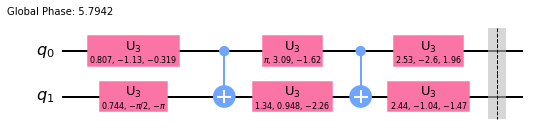

In [13]:
import numpy as np
from MPS_decomposition.hdf5_reader import MPSAdapter
adapter = MPSAdapter([[np.matrix(unitary_math.data)]], qi.Statevector.from_instruction(cir), 2, 1)
decomposed = BasicDecomposer(adapter).decompose(barrier=True)
decomposed.draw(output='mpl')

In [15]:
state_vector_org = qi.Statevector.from_instruction(cir)
state_vector_dec = qi.Statevector.from_instruction(decomposed)
vector_dot = np.vdot(state_vector_org.data, state_vector_dec)
print("Scalar product (circuit 1): " , np.abs(vector_dot))

Scalar product (circuit 1):  0.9999999999999996
